In [24]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()  # Load environment variables from .env file

True

In [25]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percentage: float
    summary: str

In [26]:
def calculate_strike_rate(state: BatsmanState):
    sr = (state['runs'] / state['balls']) * 100 if state['balls'] > 0 else 0.0
    return {'sr': sr}

In [27]:
def calculate_balls_per_boundary(state: BatsmanState):
    total_boundaries = state['fours'] + state['sixes']
    bpb = state['balls'] / total_boundaries if total_boundaries > 0 else float('inf')
    return {'bpb': bpb}

In [28]:
def calculate_boundary_percentage(state: BatsmanState):
    # total_boundaries = state['fours'] + state['sixes']
    # boundary_percentage = (total_boundaries / state['balls']) * 100 if state['balls'] > 0 else 0.0
    # state['boundary_percentage'] = boundary_percentage
    boundary_percentage = (((state['fours'] * 4 ) + ( state['sixes'] * 6 )) / state['runs']) * 100 if state['balls'] > 0 else 0.0

    return {"boundary_percentage": boundary_percentage}

In [29]:
def summary(state: BatsmanState):
    sumry = (f"Batsman scored {state['runs']} runs off {state['balls']} balls, "
            f"with a strike rate of {state['sr']:.2f}, "
            f"balls per boundary of {state['bpb']:.2f}, "
            f"and a boundary percentage of {state['boundary_percentage']:.2f}%.")

    return {"summary" : sumry}

In [30]:
def compute_derived_metrics(state: BatsmanState):
    state['sr'] = (state['runs'] / state['balls']) * 100 if state['balls'] > 0 else 0
    state['bpb'] = state['balls'] / state['runs'] if state['runs'] > 0 else 0
    total_boundaries = state['fours'] + state['sixes']
    boundary_percentage = (total_boundaries / state['balls']) * 100 if state['balls'] > 0 else 0
    return {"boundary_percentage": boundary_percentage}

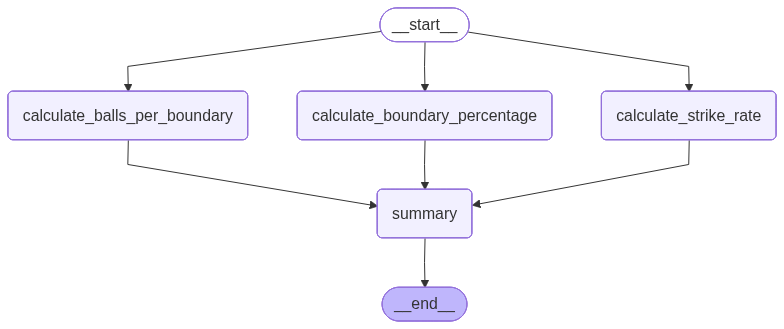

In [31]:
graph = StateGraph(BatsmanState)

# graph.add_node(
#     name="start",
#     description="Initial state of the batsman with zero runs, balls, fours, and sixes.",
#     initial_state=BatsmanState(
#         run=0, balls=0, fours=0, sixes=0, sr=0.0, bpb=0.0, boundary_percentage=0.0
#     ),
# )

graph.add_node('calculate_strike_rate', calculate_strike_rate, description="Calculate the strike rate of the batsman.")
graph.add_node('calculate_balls_per_boundary', calculate_balls_per_boundary, description="Calculate the balls per boundary ratio of the batsman.")
graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage, description="Calculate the boundary percentage of the batsman.")
graph.add_node('summary', summary , description="Summary of the batsman with all metrics calculated.")

graph.add_edge(START, 'calculate_strike_rate')
graph.add_edge(START, 'calculate_balls_per_boundary')
graph.add_edge(START, 'calculate_boundary_percentage')
graph.add_edge('calculate_strike_rate', 'summary')
graph.add_edge('calculate_balls_per_boundary', 'summary')
graph.add_edge('calculate_boundary_percentage', 'summary')
graph.add_edge('summary', END)


workflow = graph.compile()
workflow

In [33]:
intial_state = { 'runs':100, 'balls': 50, 'fours': 6, 'sixes': 4 }

workflow.invoke(intial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percentage': 48.0,
 'summary': 'Batsman scored 100 runs off 50 balls, with a strike rate of 200.00, balls per boundary of 5.00, and a boundary percentage of 48.00%.'}